#INTEGRANTES:
##Carlos Andrés Gutiérrez Benavides - 2200184
##Juan David Marin Barragán - 2200157
##Daniel Jair Cañate Velasco - 2200196


##Emotion detection:
https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer

Tamaño: 35.9k



*   Train: 24.282
    * Angry: 3995
    * Disgusted: 436
    * Fearful: 4097
    * Happy: 7215
    * Neutral: 4965
    * Sad: 4830
    * surprised: 3171

*   Test: 7178








#Librerias



In [ ]:
import os
import pandas as pd
import numpy as np
import random
import seaborn as sns
sns.set_theme()
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from joblib import dump
from joblib import load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Montar el drive

In [ ]:
import os
from google.colab import drive

path = "/content/drive/My Drive/Proyecto IA"
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1RJdbXAWiwID162JN0IevNCxkN1GB4qOj/Proyecto IA


#Cargar y procesar los datos

##importar los datos

In [ ]:
imagenes, etiquetas= load('/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset1.pkl')

##Pre-procesar los datos

In [ ]:
from sklearn.model_selection import train_test_split

# Separar el 10% de los datos en una nueva variable
datos, datosV, etiquetas, etiquetasV = train_test_split(imagenes, etiquetas, test_size=0.1, random_state=42)

# Verificar el tamaño de los conjuntos de datos
print("Tamaño del conjunto de datos:", len(datos))
print("Tamaño del conjunto de validación:", len(datosV))

Tamaño del conjunto de datos: 32094
Tamaño del conjunto de validación: 3566


In [ ]:
print(imagenes.shape
      )

(35660, 48, 48)


In [ ]:
print(etiquetas.shape
      )

(32094,)


---
# **Aprendizaje no supervisado**<a name="eje4"></a>
---

**Agglomerative Clustering vs K-means.** .

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


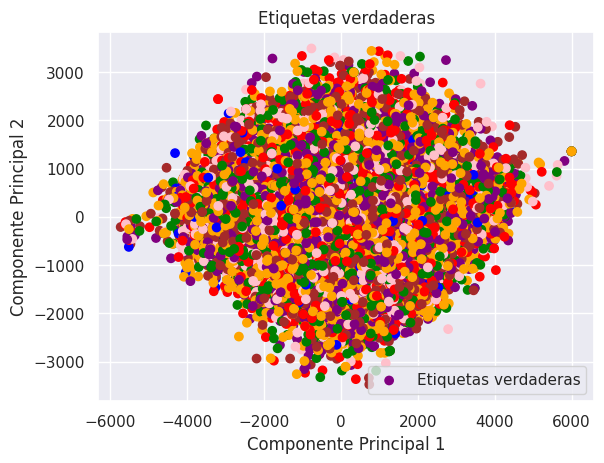

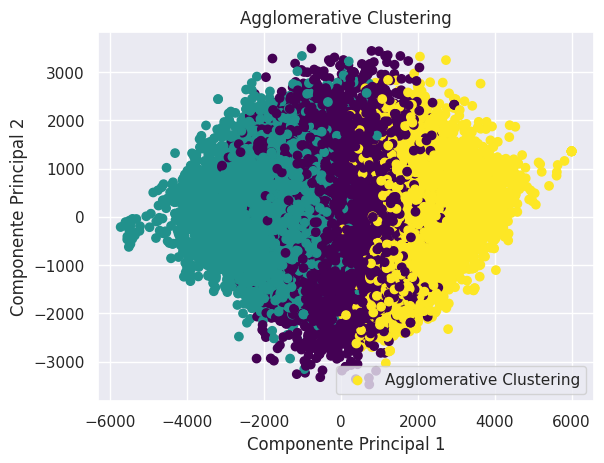

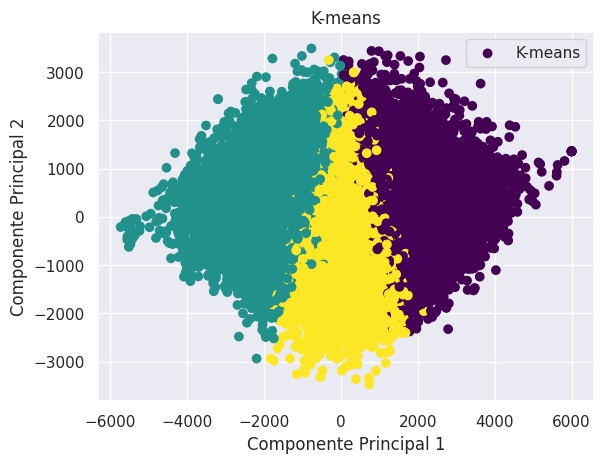

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt


X = imagenes
y = etiquetas

# Seleccionar una muestra de datos para acelerar el proceso
sample_size = 30000
X = X[:sample_size]
y = y[:sample_size]

# Reshape de las imágenes aplanadas a su forma original
X_images = X.reshape((-1, 48, 48))

# Aplanar las imágenes
X_flattened = X.reshape((-1, 48 * 48))

# Realizar el agrupamiento con Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(X_flattened)

# Realizar el agrupamiento con K-means
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(X_flattened)

# Reducir la dimensionalidad para visualizar los resultados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flattened)

# Definir colores para las clases
class_colors = {
    'angry': 'red',
    'disgusted': 'blue',
    'fearful': 'green',
    'happy': 'orange',
    'neutral': 'purple',
    'sad': 'brown',
    'surprised': 'pink',
}

# Visualizar los resultados con etiquetas verdaderas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[class_colors[label] for label in y], label='Etiquetas verdaderas')
plt.title("Etiquetas verdaderas")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

# Visualizar los resultados del agrupamiento de Agglomerative Clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerative_labels, cmap='viridis', label='Agglomerative Clustering')
plt.title("Agglomerative Clustering")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

# Visualizar los resultados del agrupamiento de K-means
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', label='K-means')
plt.title("K-means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics

# Evaluación de Agglomerative Clustering
agglomerative_silhouette_score = metrics.silhouette_score(X_flattened, agglomerative_labels)
agglomerative_calinski_harabasz_score = metrics.calinski_harabasz_score(X_flattened, agglomerative_labels)

print("Resultados del Agglomerative Clustering:")
print("Puntuación de silueta:", agglomerative_silhouette_score)
print("Puntuación de Calinski-Harabasz:", agglomerative_calinski_harabasz_score)

# Evaluación de K-means
kmeans_silhouette_score = metrics.silhouette_score(X_flattened, kmeans_labels)
kmeans_calinski_harabasz_score = metrics.calinski_harabasz_score(X_flattened, kmeans_labels)

print("Resultados del K-means:")
print("Puntuación de silueta:", kmeans_silhouette_score)
print("Puntuación de Calinski-Harabasz:", kmeans_calinski_harabasz_score)


Resultados del Agglomerative Clustering:
Puntuación de silueta: 0.0756205537984508
Puntuación de Calinski-Harabasz: 3983.0424443601414
Resultados del K-means:
Puntuación de silueta: 0.10078289939140173
Puntuación de Calinski-Harabasz: 4767.914689181788
